In [81]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [83]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv')

In [84]:
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [86]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0               0  7129300520  20141013T000000  221900.0       3.0       1.00   
1               1  6414100192  20141209T000000  538000.0       3.0       2.25   
2               2  5631500400  20150225T000000  180000.0       2.0       1.00   
3               3  2487200875  20141209T000000  604000.0       4.0       3.00   
4               4  1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...         ...              ...       ...       ...        ...   
21608       21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609       21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610       21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611       21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612       21612  1523300157  20141015T000000  325000.0       2.0       0.

In [87]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [88]:
# Drop the columns "id" and "Unnamed: 0" from axis 1
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

# Get a statistical summary of the data
print(df.describe())


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [89]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [90]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [91]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [92]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [93]:
# Count the number of houses with unique floor values and convert to DataFrame
floor_counts = df['floors'].value_counts().to_frame()

# Display the result
print(floor_counts)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


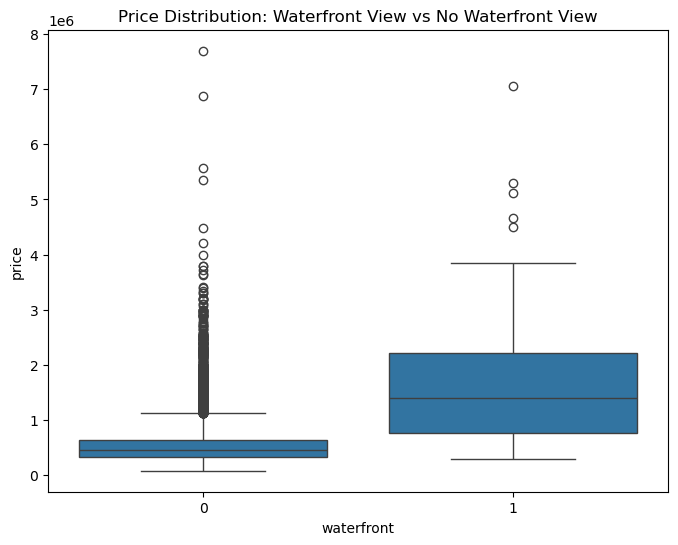

In [94]:
# Create a boxplot to compare the prices of houses with and without a waterfront view
plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront', y='price', data=df)

# Add a title
plt.title('Price Distribution: Waterfront View vs No Waterfront View')

# Show the plot
plt.show()

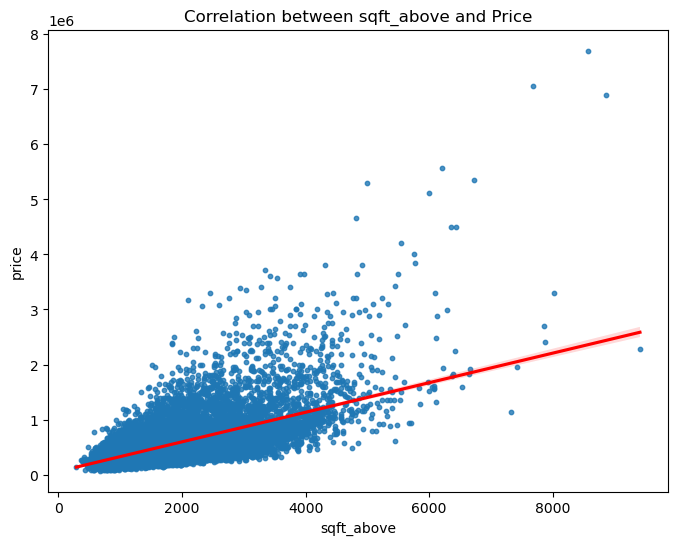

In [95]:
# Create a regression plot to see the relationship between sqft_above and price
plt.figure(figsize=(8,6))
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add a title
plt.title('Correlation between sqft_above and Price')

# Show the plot
plt.show()

In [96]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [97]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [99]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import r2_score

# Define the features and the target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", 
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]  # Features
y = df['price']   # Target variable (price)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(X_test)

# Calculate the R^2 (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Print the R^2 score
print(f'R^2: {r2}')

R^2: 0.6613966796858519


In [100]:
# Create a list of tuples containing steps for the pipeline
estimators = [
    ('scale', StandardScaler()),                  # Scaling the features
    ('polynomial', PolynomialFeatures(include_bias=False)),  # Adding polynomial features
    ('model', LinearRegression())                  # Linear Regression model
]

# Create a pipeline object
pipeline = Pipeline(estimators)

# Fit the pipeline with the training data
pipeline.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = pipeline.predict(X_test)

# Calculate the R^2 (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Print the R^2 score
print(f'R^2: {r2}')

R^2: 0.7108401534153652


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [102]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [103]:
from sklearn.linear_model import Ridge

In [104]:
# Define the features and target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", 
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]  # Features
Y = df['price']   # Target variable (price)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

# Print the number of samples in training and test sets
print("Number of test samples:", x_test.shape[0])
print("Number of training samples:", x_train.shape[0])

# Create the Ridge regression model with alpha=0.1
ridge_reg = Ridge(alpha=0.1)

# Fit the model on the training data
ridge_reg.fit(x_train, y_train)

# Predict the target values for the test data
y_pred = ridge_reg.predict(x_test)

# Calculate the R^2 (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Print the R^2 score
print(f'R^2 score: {r2}')

Number of test samples: 3242
Number of training samples: 18371
R^2 score: 0.6478759163939121


In [105]:

# Step 1: Perform second order polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)  # Second order polynomial transformation
x_train_poly = poly.fit_transform(x_train)  # Transform the training data
x_test_poly = poly.transform(x_test)  # Transform the test data

# Step 2: Create and fit the Ridge regression model
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train_poly, y_train)

# Step 3: Predict the target values for the test data
y_pred = ridge_reg.predict(x_test_poly)

# Step 4: Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Print the R^2 score
print(f'R^2 score: {r2}')

R^2 score: 0.7002744267244537
